In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("../churn.db")

df = pd.read_sql("SELECT * FROM customers_raw", conn)
conn.close()

df.shape, df.head()

((7043, 21),
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
 0  7590-VHVEG  Female              0     Yes         No       1           No   
 1  5575-GNVDE    Male              0      No         No      34          Yes   
 2  3668-QPYBK    Male              0      No         No       2          Yes   
 3  7795-CFOCW    Male              0      No         No      45           No   
 4  9237-HQITU  Female              0      No         No       2          Yes   
 
       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
 0  No phone service             DSL             No  ...               No   
 1                No             DSL            Yes  ...              Yes   
 2                No             DSL            Yes  ...               No   
 3  No phone service             DSL            Yes  ...              Yes   
 4                No     Fiber optic             No  ...               No   
 
   TechSupport StreamingTV Streamin

In [3]:
df.isna().mean().sort_values(ascending=False).head(10)

TotalCharges        0.001562
customerID          0.000000
DeviceProtection    0.000000
MonthlyCharges      0.000000
PaymentMethod       0.000000
PaperlessBilling    0.000000
Contract            0.000000
StreamingMovies     0.000000
StreamingTV         0.000000
TechSupport         0.000000
dtype: float64

In [4]:
churn_counts = df["Churn"].value_counts(dropna=False)
churn_rate = (df["Churn"] == "Yes").mean()

churn_counts, churn_rate

(Churn
 No     5174
 Yes    1869
 Name: count, dtype: int64,
 0.2653698707936959)

In [9]:
df["tenure_bucket"] = pd.cut(df["tenure"], bins=[0,6,12,24,48,72], right=True, include_lowest=True)
tenure_churn = df.groupby("tenure_bucket")["Churn"].apply(lambda s: (s=="Yes").mean()).reset_index(name="churn_rate")
tenure_churn

C:\Users\pooja\AppData\Local\Temp\ipykernel_171956\2903488635.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby("tenure_bucket")["Churn"].apply(lambda s: (s=="Yes").mean()).reset_index(name="churn_rate")


,tenure_bucket,churn_rate
0,"(-0.001, 6.0]",0.529372
1,"(6.0, 12.0]",0.358865
2,"(12.0, 24.0]",0.287109
3,"(24.0, 48.0]",0.203890
4,"(48.0, 72.0]",0.095132


In [6]:
contract_churn = df.groupby("Contract")["Churn"].apply(lambda s: (s=="Yes").mean()).reset_index(name="churn_rate")
contract_churn.sort_values("churn_rate", ascending=False)

,Contract,churn_rate
0,Month-to-month,0.427097
1,One year,0.112695
2,Two year,0.028319


In [7]:
pay_churn = df.groupby("PaymentMethod")["Churn"].apply(lambda s: (s=="Yes").mean()).reset_index(name="churn_rate")
pay_churn.sort_values("churn_rate", ascending=False)

,PaymentMethod,churn_rate
2,Electronic check,0.452854
3,Mailed check,0.191067
0,Bank transfer (automatic),0.167098
1,Credit card (automatic),0.152431


In [8]:
charges_summary = df.groupby("Churn")["MonthlyCharges"].describe()
charges_summary

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


In [10]:
import os
os.makedirs("../outputs/metrics", exist_ok=True)

tenure_churn.to_csv("../outputs/metrics/tenure_churn.csv", index=False)
contract_churn.to_csv("../outputs/metrics/contract_churn.csv", index=False)
pay_churn.to_csv("../outputs/metrics/payment_churn.csv", index=False)

print("Saved EDA CSVs to outputs/metrics/")

Saved EDA CSVs to outputs/metrics/


In [11]:
churn_counts, churn_rate

(Churn
 No     5174
 Yes    1869
 Name: count, dtype: int64,
 0.2653698707936959)

In [12]:
contract_churn.sort_values("churn_rate", ascending=False)

,Contract,churn_rate
0,Month-to-month,0.427097
1,One year,0.112695
2,Two year,0.028319


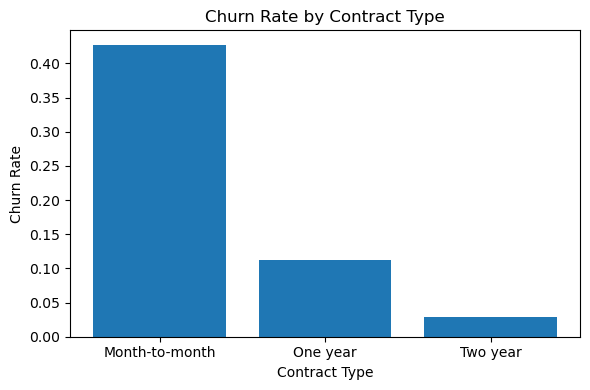

In [13]:
import matplotlib.pyplot as plt

contract_churn_sorted = contract_churn.sort_values("churn_rate", ascending=False)

plt.figure(figsize=(6,4))
plt.bar(contract_churn_sorted["Contract"], contract_churn_sorted["churn_rate"])
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.xlabel("Contract Type")
plt.tight_layout()
plt.show()

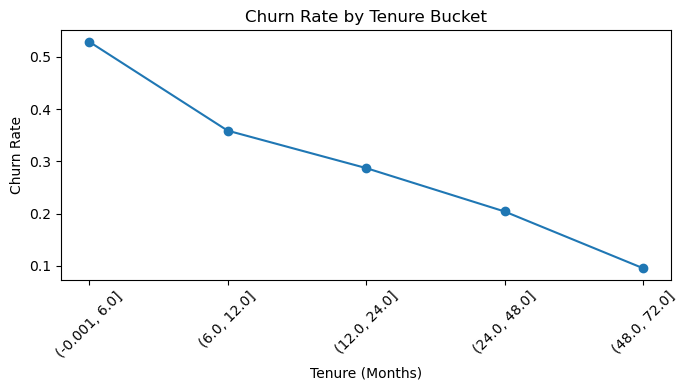

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.plot(
    tenure_churn["tenure_bucket"].astype(str),
    tenure_churn["churn_rate"],
    marker="o"
)
plt.title("Churn Rate by Tenure Bucket")
plt.ylabel("Churn Rate")
plt.xlabel("Tenure (Months)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()